<h1> Machine Learning: Regression Model</h1>
<h2>"Gold Price Prediction Model"</h2>

<p>
    <font size='3'> Gold is perceived as one of the safest investment, so the price of gold mostly increases during economic crisis. Since the latest economic crisis, Covid 19 pandemic, without doubt, the price of gold has also been rising. Considering this circumstance and relationship, I will explore the data to find relevant feature among indicators reflecting Covid trend, and build a regression prediction model that you can predict next day's gold price based on today's number of new cases and new deaths of Covid 19.
        <ul>
            <li><b>Dataset:</b> the past Gold ETF(<a href src="https://en.wikipedia.org/wiki/SPDR_Gold_Shares">GLD</a>) prices, COVID 19 dataset </li>
            <li><b>Prediction Target:</b> the next-day price of gold </li>
        </ul>
    </font>
    <font size='2'>
        Gold ETF price data source: <a href scr='https://finance.yahoo.com/quote/GLD/'>Yahoo Finance, SPDR Gold Shares</a>
        <br>
        COVID 19 data source: <a href scr='https://ourworldindata.org/coronavirus-source-data'>Our World in Data, Coronavirus Source Data</a>
    </font>
</p>

In [1]:
import wget
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# load data: covid 19 data
covid_df=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

## About Dataset

This COVID-19 dataset is a collection of the COVID-19 data maintained by [Our World in Data](https://ourworldindata.org/coronavirus-source-data). It is updated daily and includes data on confirmed cases, deaths, hospitalizations, testing, and vaccinations as well as other variables of potential interest.

**Column details can be found [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv)**

## 1. Exploratory Data Analysis

In [3]:
covid_df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
71045,ZWE,Africa,Zimbabwe,2021-02-20,35768.0,58.0,94.857,1432.0,2.0,4.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71046,ZWE,Africa,Zimbabwe,2021-02-21,35796.0,28.0,89.143,1436.0,4.0,5.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71047,ZWE,Africa,Zimbabwe,2021-02-22,35862.0,66.0,91.429,1441.0,5.0,4.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71048,ZWE,Africa,Zimbabwe,2021-02-23,35910.0,48.0,85.000,1448.0,7.0,4.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71049,ZWE,Africa,Zimbabwe,2021-02-24,35960.0,50.0,76.714,1456.0,8.0,5.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [4]:
# load data: gold ETF, 'GLD' price
# period: form the start date of covid dataset to today

covid_sdate=covid_df['date'].min()
today=pd.to_datetime('today')
gld_df=yf.download('GLD', covid_sdate, today, auto_adjust=True)
gld_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,143.860001,144.210007,143.399994,143.949997,7733800
2020-01-03,145.750000,146.320007,145.399994,145.860001,12272800
2020-01-06,148.440002,148.479996,146.949997,147.389999,14403300
2020-01-07,147.570007,148.139999,147.429993,147.970001,7978500
2020-01-08,148.490005,148.610001,146.139999,146.860001,22248500


In [5]:
# reset index
gld_df.reset_index(inplace=True)
gld_df.tail()

,Date,Open,High,Low,Close,Volume
284,2021-02-18,166.979996,167.300003,165.729996,166.320007,7474400
285,2021-02-19,166.759995,167.940002,166.600006,167.009995,8268900
286,2021-02-22,168.539993,169.889999,168.300003,169.509995,10072000
287,2021-02-23,169.479996,169.740005,168.279999,169.119995,8612100
288,2021-02-24,167.649994,169.139999,167.149994,169.000000,8885100


In [6]:
gld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    289 non-null    datetime64[ns]
 1   Open    289 non-null    float64       
 2   High    289 non-null    float64       
 3   Low     289 non-null    float64       
 4   Close   289 non-null    float64       
 5   Volume  289 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 13.7 KB


In [7]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71050 entries, 0 to 71049
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               71050 non-null  object 
 1   continent                              67515 non-null  object 
 2   location                               71050 non-null  object 
 3   date                                   71050 non-null  object 
 4   total_cases                            70137 non-null  float64
 5   new_cases                              70135 non-null  float64
 6   new_cases_smoothed                     69134 non-null  float64
 7   total_deaths                           61102 non-null  float64
 8   new_deaths                             61260 non-null  float64
 9   new_deaths_smoothed                    69134 non-null  float64
 10  total_cases_per_million                69753 non-null  float64
 11  ne

In [8]:
covid_df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Europe', 'European Union', 'Faeroe Islands', 'Falkland Islands',
       'Fiji', 'Finland', 'Fran

<br>
<p>
    <font size='3'>This data contains the observations by each country such as 'United Kingdom' as well as by area such as 'North Americas'. Luckily, there is a location category, 'world.' For convenience, I'll select the data with the value, 'world' in the location column.
    </font>
</p>
<br>

In [9]:
# pick rows related to worldwide data.
fea_df=covid_df[covid_df['location']=='World']
fea_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 69643 to 70042
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               400 non-null    object 
 1   continent                              0 non-null      object 
 2   location                               400 non-null    object 
 3   date                                   400 non-null    object 
 4   total_cases                            400 non-null    float64
 5   new_cases                              400 non-null    float64
 6   new_cases_smoothed                     394 non-null    float64
 7   total_deaths                           400 non-null    float64
 8   new_deaths                             400 non-null    float64
 9   new_deaths_smoothed                    394 non-null    float64
 10  total_cases_per_million                400 non-null    float64
 11  

<br>
<p>
    <font size='3'> I picked 'date', 'new_cases', and 'new_deaths' as they seem like the most relevant data demonstrating the daily rise and fall of covid numbers while the rest columns are accumulated values or demographic informaton.
        'New vaccination' could be a potentially good predictor, but the number of data is still very low (62 as the date of Feburary 24th, 2021), so I excluded it from further analysis. 
    </font>
</p>
<br>

In [10]:
# pick relevant columns
fea_df=fea_df[['date','new_cases','new_deaths']]

# reset index
fea_df.reset_index(drop=True, inplace=True)

# view a dataframe
fea_df.tail()

,date,new_cases,new_deaths
395,2021-02-20,370265.0,8515.0
396,2021-02-21,313693.0,5880.0
397,2021-02-22,288787.0,7039.0
398,2021-02-23,387864.0,11256.0
399,2021-02-24,444543.0,12053.0


In [11]:
fea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        400 non-null    object 
 1   new_cases   400 non-null    float64
 2   new_deaths  400 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.5+ KB


In [12]:
# merge the gold price dataframe and covid dataframe

# rename the column name of date to match with the other dataframe.
gld_df.rename(columns={'Date':'date'},inplace=True)
gld=gld_df[['date','Close']]

# covert data type to match with the other dataframe.
fea_df['date']=pd.to_datetime(fea_df['date'])

# merge
gc_df=fea_df.merge(gld, how='inner', on='date')
gc_df.tail()

,date,new_cases,new_deaths,Close
271,2021-02-18,403209.0,11164.0,166.320007
272,2021-02-19,439395.0,11106.0,167.009995
273,2021-02-22,288787.0,7039.0,169.509995
274,2021-02-23,387864.0,11256.0,169.119995
275,2021-02-24,444543.0,12053.0,169.000000


In [13]:
gc_df.shape

(276, 4)

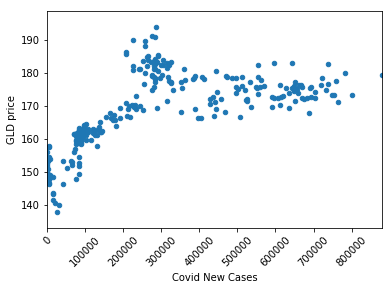

In [14]:
# plot the number of Covid new dases and GLD price
gc_df.plot(x='new_cases', y='Close', kind='scatter')
plt.xticks(rotation=45)
plt.xlabel('Covid New Cases')
plt.ylabel('GLD price')
plt.xlim(gc_df.new_cases.min(), gc_df.new_cases.max())
plt.ylim(gc_df.Close.min()-5, gc_df.Close.max()+5)
plt.show()

<br>
<p>
    <font size='3'> The plot shows that GLD price grew very steeply from 140 to 170 USD in the section of Covid new cases, 0 to 100,000 ns  a spike over 190 USD came in the section, 200,000 to 300,000.
        After 300,000 cases, the price moved between 170 USD 180 USD. It appears that the number of daily covid new cases could be a good predictor for GLD price.
    </font>
</p>
<br>

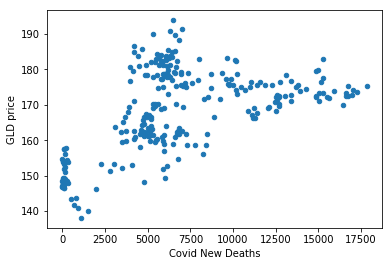

In [15]:
# plot the number of Covid new cases and GLD price
gc_df.plot(x='new_deaths', y='Close', kind='scatter')
plt.xlabel('Covid New Deaths')
plt.ylabel('GLD price')
plt.show()

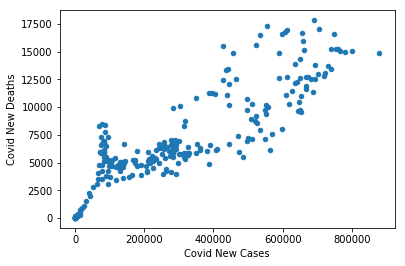

In [16]:
# plot the number of Covid new cases and GLD price
gc_df.plot(x='new_cases', y='new_deaths', kind='scatter')
plt.xlabel('Covid New Cases')
plt.ylabel('Covid New Deaths')
plt.show()

<br>
<p>
    <font size='3'> The plot shows that GLD prices along x-axis are too disperse and can't see the general trend of datapoints. The number of daily covid new death may not be a good predictor for GLD price. However, I'll check if there is any distinguishable trend when both features are plotted in 3D graph.
    </font>
</p>
<br>

In [17]:
gc_df=gc_df.sort_values('new_cases')
gc_df=gc_df.reset_index(drop=True)

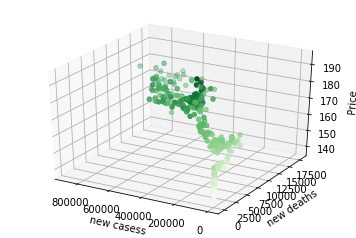

In [18]:
# plotting 3D
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')


# Data for a three-dimensional scattered points
zdata = gc_df.Close
xdata = gc_df.new_cases
ydata = gc_df.new_deaths

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.set_xlabel('new casess')
ax.set_ylabel('new deaths')
ax.set_zlabel('Price')
ax.invert_xaxis()
ax.view_init(30, 300)

<br>
<p>
    <font size='3'>
        3D plot doesn't demonstrate a particular shape and I can't see any impact by the number of new death in changing the shape.  
        <br>
        Therefore, I will exclude 'new death' from feature set. 
    </font>
</p>
<br>

In [19]:
# move the position of row upward to make 'Close' columns as next day's price
gc_df['Close']=gc_df['Close'].shift(-1)

# drop the last row
gc_df=gc_df.drop(index=gc_df.shape[0]-1)

# rename the price column
gc_df=gc_df.rename(columns={'Close':'next_day_price'})

## 2. Modeling

In [20]:
# import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# import the library pipeline
from sklearn.pipeline import Pipeline

# pipeline constructor #create a list of turples
xtrain, xtest, ytrain, ytest=train_test_split(gc_df[['new_cases']], gc_df['next_day_price'], test_size=0.3, random_state=0)
Input=[('Scale', StandardScaler()),('polynomial', PolynomialFeatures(degree=3)), ('model', LinearRegression()) ] 
pipe=Pipeline(Input)  #input the list in the pipeline constructor.

# train the pipeline object
pipe.fit(xtrain, ytrain)

# produce prediction
yhat=pipe.predict(xtest)

## 3. Model Evaluation

In [22]:
# evaluate the model
print('Evaluation Score: {0:.2f} %'.format(pipe.score(xtest, ytest)*100))

Evaluation Score: 72.99 %


## 4. Model Visualization

In [23]:
# create a dataframe with actual GLD price and predicted price.
test=xtest
test['actual_price']=ytest
test['predicted_price']=yhat

# sort values by the number of new cases in ascending order
test=test.sort_values('new_cases')
test.reset_index(drop=True, inplace=True)

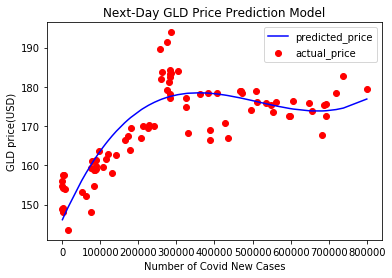

In [24]:
# plot predition line and actual observations

# plot actual price data points
plt.scatter(test.new_cases,test.actual_price, color='red')

# plot prediction model (polynomial regression model)
plt.plot(test.new_cases, test.predicted_price, color='blue')
plt.title('Next-Day GLD Price Prediction Model')
plt.xlabel('Number of Covid New Cases')
plt.ylabel('GLD price(USD)')
plt.legend()
plt.show()

## Additional Theory Testing: GLD price prediction model with Russell 2000 index
<br>
<p>
    <font size='3'>
         Russell 2000 Index is a small-cap stock index consisting of the smallest 2,000 stocks in the Russell 3000 Index, often regarded as risky investment, and hence sensatively respond to the economic situation. In the light of such characteristics, I will explore the index's relationship with GLD price and generate a prediction model to see if the index can also be a good predictor. 
    </font>
</p>
<br>


In [55]:
# load 'Russell 2000 index' data
rs=yf.download('^RUT', covid_sdate, today, auto_adjust=True)
print('Russell 2000 Index: ',rs.shape[0])

[*********************100%***********************]  1 of 1 completed
Russell 2000 Index:  289


In [56]:
rs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 289 entries, 2020-01-02 to 2021-02-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    289 non-null    float64
 1   High    289 non-null    float64
 2   Low     289 non-null    float64
 3   Close   289 non-null    float64
 4   Volume  289 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.5 KB


In [57]:
rs=rs.reset_index()
rs.head()

,Date,Open,High,Low,Close,Volume
0,2020-01-02,1675.900024,1678.140015,1653.520020,1666.770020,3458250000
1,2020-01-03,1655.020020,1664.040039,1648.540039,1660.869995,3461290000
2,2020-01-06,1650.660034,1664.849976,1645.510010,1663.260010,3674070000
3,2020-01-07,1659.729980,1662.099976,1653.329956,1658.310059,3420380000
4,2020-01-08,1658.469971,1669.290039,1658.229980,1663.589966,3720890000


In [58]:
gld.head()

,date,Close
0,2020-01-02,143.949997
1,2020-01-03,145.860001
2,2020-01-06,147.389999
3,2020-01-07,147.970001
4,2020-01-08,146.860001


In [59]:
# rearrange a dataframe
fea_df2=rs[['Date','Close']]
fea_df2=fea_df2.rename(columns={'Date':'date','Close':'Russell_2000_Index'})
pd.to_datetime(fea_df2.date)
fea_df2.head()

,date,Russell_2000_Index
0,2020-01-02,1666.770020
1,2020-01-03,1660.869995
2,2020-01-06,1663.260010
3,2020-01-07,1658.310059
4,2020-01-08,1663.589966


In [60]:
# add the column, next-day gld price
gr_df=fea_df2.merge(gld, how='inner', on='date')
gr_df.head()

,date,Russell_2000_Index,Close
0,2020-01-02,1666.770020,143.949997
1,2020-01-03,1660.869995,145.860001
2,2020-01-06,1663.260010,147.389999
3,2020-01-07,1658.310059,147.970001
4,2020-01-08,1663.589966,146.860001


In [61]:
gr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 288
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                289 non-null    datetime64[ns]
 1   Russell_2000_Index  289 non-null    float64       
 2   Close               289 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 9.0 KB


In [62]:
# make GLD price column as next day price
gr_df.Close=gr_df.Close.shift(-1)

gr_df=gr_df.dropna(axis=0)
gr_df.reset_index(drop=True, inplace=True)

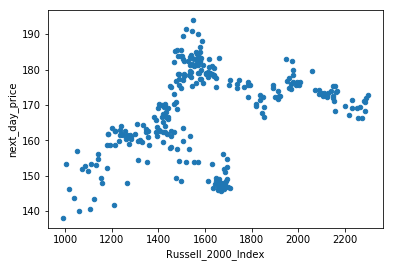

In [64]:
gr_df.rename(columns={'Close':'next_day_price'}, inplace=True)
gr_df.plot(x='Russell_2000_Index', y='next_day_price', kind='scatter')
plt.show()

In [65]:
# pipeline constructor #create a list of turples
xtrain2, xtest2, ytrain2, ytest2=train_test_split(gr_df[['Russell_2000_Index']], gr_df['next_day_price'], test_size=0.2, random_state=0)

degrees=[]
models=[]
yhats=[]
accuracies=[]
for d in range(2,20):
    degrees.append(d)
    Input2=[('Scale', StandardScaler()),('polynomial', PolynomialFeatures(degree=d)), ('model', LinearRegression()) ] 
    pipe2=Pipeline(Input2)  #input the list in the pipeline constructor.

    # train the pipeline object
    pipe2.fit(xtrain2, ytrain2)
    models.append(pipe2)
    
    # produce prediction
    yhat2=pipe2.predict(xtest2)
    yhats.append(yhat2)

    # evaluate the model
    accuracies.append(round((pipe2.score(xtest2, ytest2)*100),2))

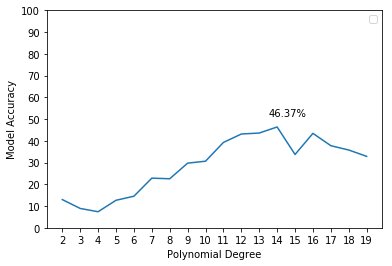

In [66]:
pd.DataFrame(accuracies, index=degrees).plot()
plt.xticks(degrees)
plt.yticks(np.arange(0,101, 10))
plt.legend('')
plt.xlabel('Polynomial Degree')
plt.ylabel('Model Accuracy')
plt.text(x=13.5, y=max(accuracies)+5, s=str(max(accuracies))+'%')
plt.show()

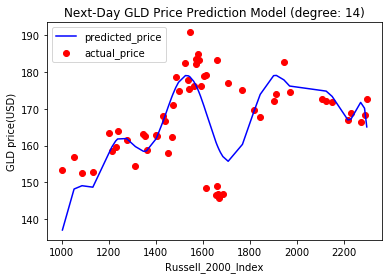

In [67]:
i=accuracies.index(max(accuracies))

# create a dataframe with actual GLD price and predicted price.
test2=xtest2
test2['actual_price']=ytest2
test2['predicted_price']=yhats[i]

# sort values by the number of new cases in ascending order
test2=test2.sort_values('Russell_2000_Index')
test2.reset_index(drop=True, inplace=True)

# plot predition line and actual observations

# plot actual price data points
plt.scatter(test2.Russell_2000_Index,test2.actual_price, color='red')

# plot prediction model (polynomial regression model)
plt.plot(test2.Russell_2000_Index, test2.predicted_price, color='blue')
plt.title('Next-Day GLD Price Prediction Model (degree: %s)' %(degrees[i]))
plt.xlabel('Russell_2000_Index')
plt.ylabel('GLD price(USD)')
plt.legend()
plt.show()

<br>
<p>
    <font size='3'>
          I found out the highest model accuracy was 46.37 % at polynomial degree, 14 when I generated multiple polynomial regression models of degree range 2 to 20. The maximum accuracy is only 46.37%, so Russell 2000 index alone doesn't seem like a good predictor for GLD price. 
    </font>
</p>
<br>